/opt/anaconda/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


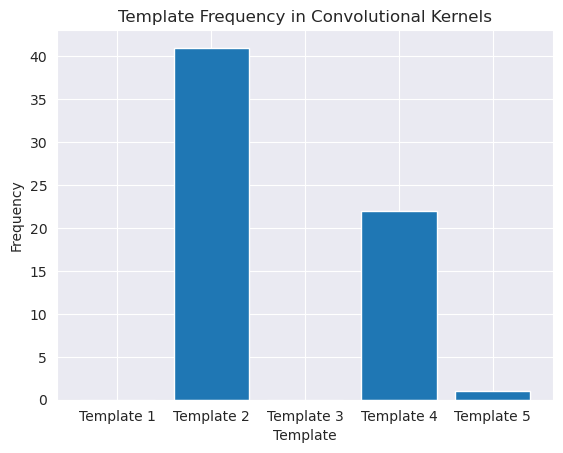

In [1]:
import torch
from torchvision import models
import numpy as np
import matplotlib.pyplot as plt

# 定义固定模板的权重参数
template_1 = np.array([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]])

template_2 = np.array([[1, 1, 1],
                       [1, -8, 1],
                       [1, 1, 1]])

template_3 = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])

template_4 = np.array([[-1, -1, -1],
                       [-1, 9, -1],
                       [-1, -1, -1]])

template_5 = np.array([[1, 0, -1],
                       [0, 0, 0],
                       [-1, 0, 1]])

# 加载ResNet18模型
model = models.resnet18(pretrained=True)

# 指定要统计的层的索引
layer_idx = 1  # 例如，这里选择第一个卷积层

# 获取指定层的卷积层
conv_layer = model.layer1[layer_idx].conv1

# 获取卷积层的权重参数
weights = conv_layer.weight.data

# 统计卷积核数量
num_kernels = weights.size(0)

# 定义固定模板的列表
templates = [template_1, template_2, template_3, template_4, template_5]

# 定义模板匹配的函数
def template_match(template, kernel):
    # 计算模板和卷积核的匹配度
    match = np.sum(template * kernel)
    return match

# 创建一个列表用于统计每个固定模板的频次
template_freq = [0] * len(templates)

# 遍历所有的卷积核
for i in range(num_kernels):
    # 获取当前卷积核的权重参数
    kernel = weights[i].numpy()

    # 初始化最高匹配度和对应的模板索引
    max_match = float('-inf')
    max_template_idx = None

    # 遍历所有的固定模板
    for j in range(len(templates)):
        # 计算当前模板和卷积核的匹配度
        match = template_match(templates[j], kernel)

        # 更新最高匹配度和对应的模板索引
        if match > max_match:
            max_match = match
            max_template_idx = j

    # 统计匹配度最高的模板的频次
    template_freq[max_template_idx] += 1

# 将统计结果绘制成柱状图
template_names = ["Template 1", "Template 2", "Template 3", "Template 4", "Template 5"]
plt.bar(template_names, template_freq)
plt.xlabel("Template")
plt.ylabel("Frequency")
plt.title("Template Frequency in Convolutional Kernels")
plt.show()


In [2]:
import torch
from torchvision import models
import numpy as np
import matplotlib.pyplot as plt

# 定义固定模板的权重参数
template_1 = np.array([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]])

template_2 = np.array([[1, 1, 1],
                       [1, -8, 1],
                       [1, 1, 1]])

template_3 = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])

template_4 = np.array([[-1, -1, -1],
                       [-1, 9, -1],
                       [-1, -1, -1]])

template_5 = np.array([[1, 0, -1],
                       [0, 0, 0],
                       [-1, 0, 1]])

# 加载ResNet18模型
model = models.resnet18(pretrained=True)

# 指定要统计的层的索引
layer_idx = 1  # 例如，这里选择第一个卷积层

# 获取指定层的卷积层
conv_layer = model.layer1[layer_idx].conv1

# 获取卷积层的权重参数
weights = conv_layer.weight.data

# 统计卷积核数量
num_kernels = weights.size(0)

# 统计卷积核尺寸分布
kernel_sizes = []
for i in range(num_kernels):
    kernel_size = np.unique(weights[i].cpu().numpy().shape[-2:])
    kernel_sizes.extend(kernel_size.tolist())

# 定义模板与卷积核尺寸的对应关系
template_dict = {3: template_1,
                 5: template_2,
                 7: template_3,
                 9: template_4,
                 11: template_5}

# 遍历卷积核尺寸，输出模板与卷积核的相似度
for size in np.unique(kernel_sizes):
    if size in template_dict.keys():
        template = template_dict[size]
        similarity_scores = []
        for i in range(num_kernels):
            kernel = weights[i].cpu().numpy()
            similarity = np.sum(kernel * template)
            similarity_scores.append(similarity)
        avg_similarity = np.mean(similarity_scores)
        print(f"对于尺寸为 {size} 的卷积核，模板与已有滤波器的平均相似度为: {avg_similarity:.4f}")
    else:
        print(f"尺寸为 {size} 的卷积核没有定义对应的模板")


/opt/anaconda/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


对于尺寸为 3 的卷积核，模板与已有滤波器的平均相似度为: 1.1052


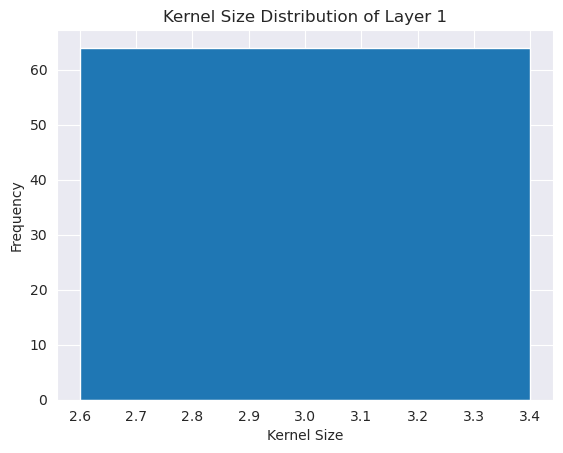

在第 1 层的卷积层中，共有 64 个卷积核
卷积核尺寸分布:
Kernel Size 3: 64 个


In [3]:
import torch
from torchvision import models
import numpy as np
import matplotlib.pyplot as plt

# 加载ResNet18模型
model = models.resnet18(pretrained=True)

# 指定要统计的层的索引
layer_idx = 1  # 例如，这里选择第一个卷积层

# 获取指定层的卷积层
conv_layer = model.layer1[layer_idx].conv1

# 获取卷积层的权重参数
weights = conv_layer.weight.data

# 统计卷积核数量
num_kernels = weights.size(0)

# 统计卷积核尺寸分布
kernel_sizes = []
for i in range(num_kernels):
    kernel_size = np.unique(weights[i].cpu().numpy().shape[-2:])
    kernel_sizes.extend(kernel_size.tolist())

# 统计卷积核尺寸的频次
kernel_sizes = np.array(kernel_sizes)
unique_sizes, counts = np.unique(kernel_sizes, return_counts=True)

# 可视化卷积核尺寸分布
plt.bar(unique_sizes, counts)
plt.xlabel('Kernel Size')
plt.ylabel('Frequency')
plt.title(f'Kernel Size Distribution of Layer {layer_idx}')
plt.show()

print(f"在第 {layer_idx} 层的卷积层中，共有 {num_kernels} 个卷积核")
print("卷积核尺寸分布:")
for size, count in zip(unique_sizes, counts):
    print(f"Kernel Size {size}: {count} 个")
